In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2
from scipy.fftpack import dct, idct, fft, ifft
from sklearn.linear_model import Lasso
import scipy.fftpack as spfft

(208, 117)


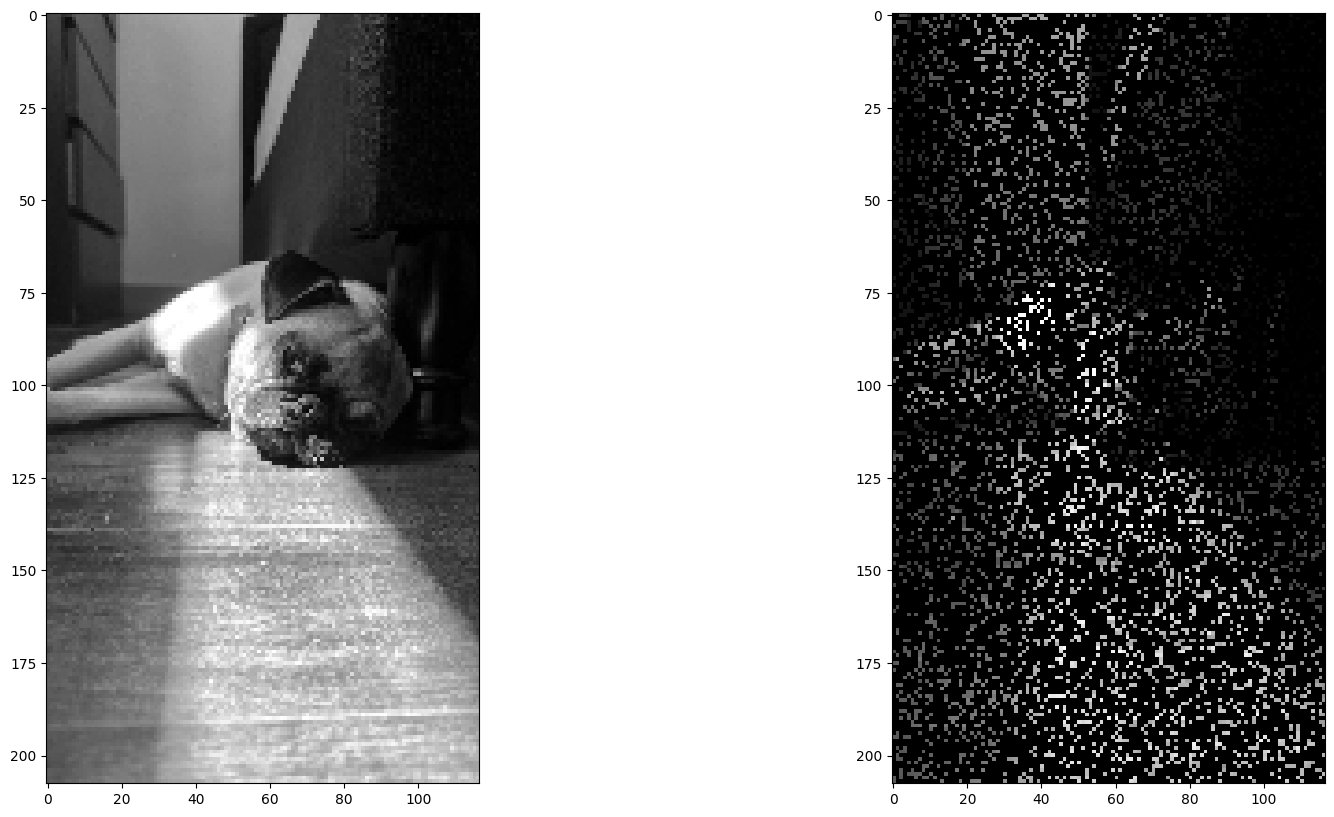

In [5]:
#Read the image
im = io.imread('smallDog.png', as_gray=True)

# im = np.zeros((10,10))

print(im.shape)

#Flatten the image matrix to an m*n x 1 vector
vecIm = im.flatten()
#Generate random indices
rng = np.random.default_rng()
randIndxs = rng.choice(len(vecIm), int(len(vecIm)*.2), replace=False)
#Take random samples
samples = vecIm[randIndxs]

#Create a mask
mask = np.zeros(vecIm.shape)
mask[randIndxs] = 1

#Multiple the mask with the image element wise.
#This gives us our y vector of random measurements
maskIm = vecIm * mask

#Graph the image and the random measurements we took
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()

ax[0].imshow(im, cmap=plt.cm.gray)
ax[1].imshow(maskIm.reshape(im.shape), cmap=plt.cm.gray)

Text(0.5, 1.0, 'Theta')

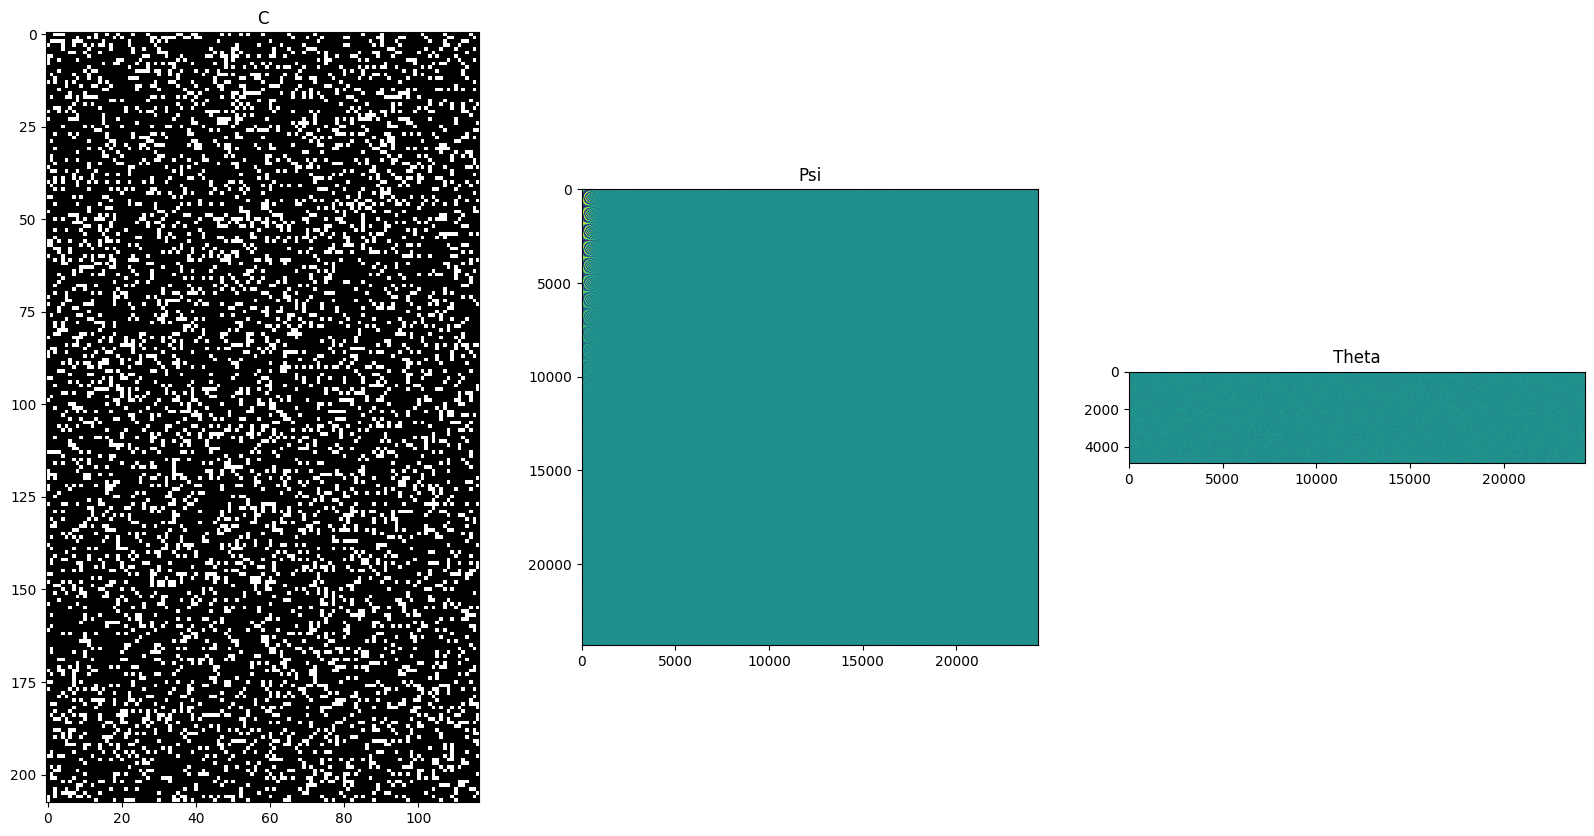

In [6]:
#Generate an identity matrix where n = # of pixels in the image
id = np.identity(len(vecIm))

#perform the discrete cosine transform
psi = dct(id)

#Sample rows with the same indices used to sample pixels
theta = psi[randIndxs]

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax = axes.ravel()

ax[0].imshow(mask.reshape(im.shape), cmap=plt.cm.gray)
ax[1].imshow(psi)
ax[2].imshow(theta)

ax[0].set_title('C')
ax[1].set_title('Psi')
ax[2].set_title('Theta')

In [7]:
#Perform Lasso regression in order to optimize for a sparse s
res = Lasso(alpha=.0001).fit(theta, samples.reshape(-1, 1))

#Grab the components of s
s = res.coef_

#Perform the inverse discrete cosine transform to return from the spectral domain to image space
r = idct(s)

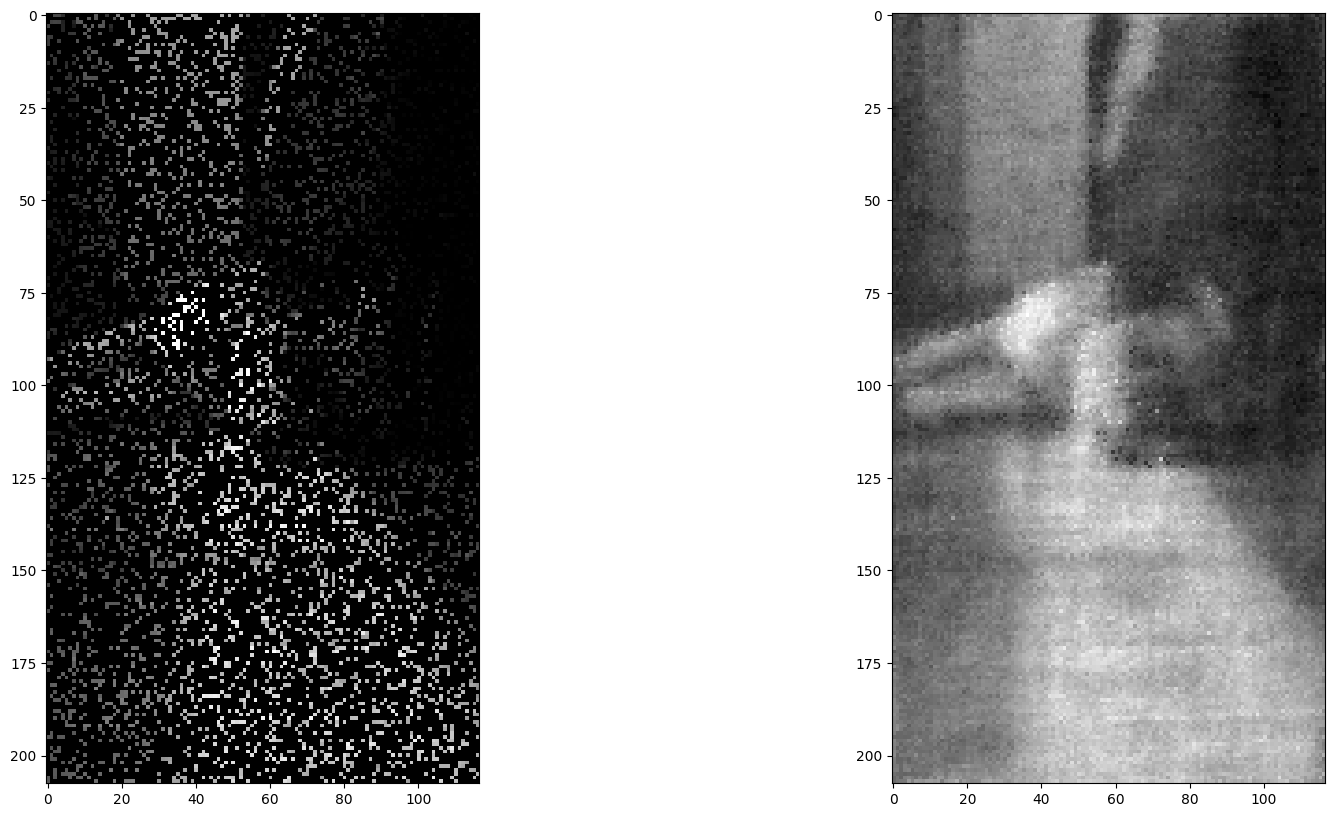

In [8]:
#Graph the image and the reconstruction
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()

ax[0].imshow(maskIm.reshape(im.shape), cmap=plt.cm.gray)
ax[1].imshow(r.reshape(im.shape), cmap=plt.cm.gray)